In [3]:
import xnet
import json
import glob

import numpy as np
import matplotlib.pyplot as plt

from igraph import *
from collections import defaultdict
from matplotlib.ticker import MaxNLocator
from util import save,load
from util import get_attr_pacs,get_pac_list,get_pacs_paper_published

In [4]:
attr_pacs = get_attr_pacs()
pac_list = get_pac_list()

data = xnet.xnet2igraph('data/citation_network_ge1985_pacs.xnet')

filenames = sorted(glob.glob('data/pacs/2lvls/*_multilevel2.xnet'))
pac_nets = []
for filename in filenames:
    net = xnet.xnet2igraph(filename)
    pac_nets.append(net)

In [3]:
def plot_freq_publications(data,delta):
    year_begin = 1986
    year_end = 2006

    X = []
    Y = []
    for i,year in enumerate(range(year_begin,year_end+1)):
        print("current year %d" % year)
        subset = data.vs.select(year_ge=year,year_le=year+delta)
        subgraph = data.subgraph(subset)
        X.append(int(year+delta))
        Y.append(subgraph.vcount())
    
    fig = plt.figure(figsize=(12,3))
    plt.plot(X,Y,marker='o')

current year 1986
current year 1987
current year 1988
current year 1989
current year 1990
current year 1991
current year 1992
current year 1993
current year 1994
current year 1995
current year 1996
current year 1997
current year 1998
current year 1999
current year 2000
current year 2001
current year 2002
current year 2003
current year 2004
current year 2005
current year 2006


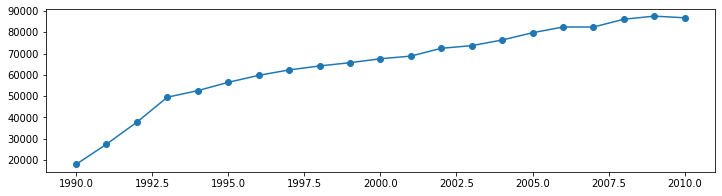

In [4]:
plot_freq_publications(data,4)

In [16]:
'''
    essa função era usada para plotar o número de autores
    considerados por ano a partir de determinado critério de seleção min de autores
'''
def plot_min_values(years,freqs_dict,title):
    plt.figure(figsize=(10,3))
    for min_value,freqs in freqs_dict.items():
        plt.plot(years,freqs,marker='o',ls='-',label=min_value)
    plt.legend()
    plt.xlabel('year')
    plt.xticks(rotation=45)
    #plt.ylabel('%')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('temp/%s.pdf' % title)
    plt.show()

In [18]:
in_by_year = defaultdict(lambda:defaultdict(lambda:0))
out_by_year = defaultdict(lambda:defaultdict(lambda:0))
for year in range(1986,2007):
    subset = data.vs.select(year_ge=year,year_le=year+4)
    subgraph = data.subgraph(subset)
    for paper in subgraph.vs:
        authors = paper['authors_idxs'].split(',')
        paper_in = len(paper.neighbors(mode=IN))
        paper_out = len(paper.neighbors(mode=OUT))
        for author in authors:
            in_by_year[year+4][author] += paper_in
            out_by_year[year+4][author] += paper_out
    
years = sorted(list(in_by_year.keys()))
in_min_values = defaultdict(lambda:[])
out_min_values = defaultdict(lambda:[])
for year in years:
    values = np.asarray(list(in_by_year[year].values()))
    for min_value in [10,25,75]:
        in_min_values[min_value].append(len(values[values>=min_value]))

    values = np.asarray(list(out_by_year[year].values()))
    for min_value in [10,25,75]:
        out_min_values[min_value].append(len(values[values>=min_value]))
        

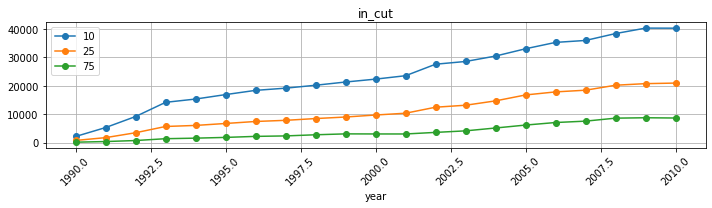

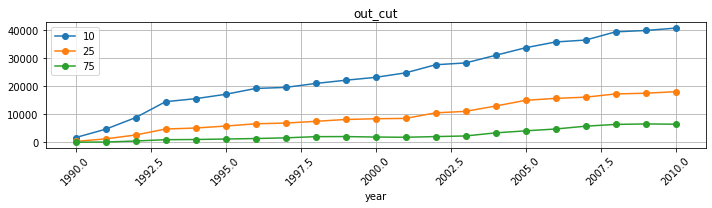

In [19]:
plot_min_values(years,in_min_values,'in_cut')
plot_min_values(years,out_min_values,'out_cut')
